# Линейная регрессия методом наименьших квадратов


Импорт библиотек:

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
%matplotlib inline

Посмотрим на вид содержимого csv файла:

In [136]:
data = pd.read_csv('/Users/poyma/Downloads/ML1/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 1. Загрузка данных

In [139]:
def load_data(filename):
    """Загрузка данных из csv файла"""
    data = pd.read_csv(filename)
    return data

## 2. Статистическая информация о данных

In [142]:
def show_statistics(data, x_col, y_col):
    """Вывод статистической информации о данных"""
    print("Статистика по столбцу X:")
    print(f"Количество: {data[x_col].count()}")
    print(f"Минимум: {data[x_col].min()}")
    print(f"Максимум: {data[x_col].max()}")
    print(f"Среднее: {data[x_col].mean()}")
    
    print("\nСтатистика по столбцу Y:")
    print(f"Количество: {data[y_col].count()}")
    print(f"Минимум: {data[y_col].min()}")
    print(f"Максимум: {data[y_col].max()}")
    print(f"Среднее: {data[y_col].mean()}")

## 3. Визуализация исходных данных

In [145]:
def plot_original_data(data, x_col, y_col, ax):
    """Визуализация исходных данных"""
    ax.scatter(data[x_col], data[y_col], color='blue', label='Исходные данные')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title('Исходные данные')
    ax.legend()
    ax.grid(True)

## 4. Метод наименьших квадратов

In [148]:
def linear_regression(data, x_col, y_col):
    """Реализация линейной регрессии методом наименьших квадратов"""
    x = data[x_col].values
    y = data[y_col].values
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    
    # Вычисление коэффициентов
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y - a * sum_x) / n
    
    return a, b

## 5. Визуализация регрессионной прямой

In [151]:
def plot_regression_line(data, x_col, y_col, a, b, ax):
    """Визуализация регрессионной прямой"""
    x = data[x_col].values
    y = data[y_col].values
    
    # Исходные данные
    ax.scatter(x, y, color='blue', label='Исходные данные')
    
    # Регрессионная прямая
    x_line = np.linspace(min(x), max(x), 100)
    y_line = a * x_line + b
    ax.plot(x_line, y_line, color='red', label='Регрессионная прямая')
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title('Регрессионная прямая')
    ax.legend()
    ax.grid(True)

## 6. Визуализация квадратов ошибок

In [154]:
def plot_error_squares(data, x_col, y_col, a, b, ax):
    """Визуализация квадратов ошибок"""
    x = data[x_col].values
    y = data[y_col].values
    y_pred = a * x + b
    
    # Исходные данные и регрессионная прямая
    ax.scatter(x, y, color='blue', label='Исходные данные')
    x_line = np.linspace(min(x), max(x), 100)
    y_line = a * x_line + b
    ax.plot(x_line, y_line, color='red', label='Регрессионная прямая')
    
    # Квадраты ошибок
    for xi, yi, yi_pred in zip(x, y, y_pred):
        # Определяем углы прямоугольника
        left = min(xi, xi)
        right = max(xi, xi)
        bottom = min(yi, yi_pred)
        top = max(yi, yi_pred)
        
        # Рисуем прямоугольник
        rect = plt.Rectangle((left, bottom), right-left, top-bottom, 
                             linewidth=1, edgecolor='green', facecolor='green', alpha=0.2)
        ax.add_patch(rect)
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title('Квадраты ошибок')
    ax.legend()
    ax.grid(True)

### Основная функция

In [157]:
def main(filename, x_col, y_col):
    """Основная функция для выполнения всех шагов"""
    # Загрузка данных
    data = load_data(filename)
    
    # Проверка наличия столбцов
    if x_col not in data.columns or y_col not in data.columns:
        print("Ошибка")
        return
    
    # Создаем фигуру с тремя subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    
    # 2. Вывод статистики
    print("Статистическая информация:")
    show_statistics(data, x_col, y_col)
    
    # 3. Визуализация исходных данных
    plot_original_data(data, x_col, y_col, ax1)
    
    # 4. Линейная регрессия
    a, b = linear_regression(data, x_col, y_col)
    print(f"\nРегрессионная прямая: y = {a:.4f}x + {b:.4f}")
    
    # 5. Визуализация регрессионной прямой
    plot_regression_line(data, x_col, y_col, a, b, ax2)
    
    # 6. Визуализация квадратов ошибок
    plot_error_squares(data, x_col, y_col, a, b, ax3)
    
    plt.tight_layout()
    plt.show()

## Интерфейс для выбора файла и столбцов

Автоматически выбраны столбцы: X = 'Hours', Y = 'Scores'
Статистическая информация:
Статистика по столбцу X:
Количество: 25
Минимум: 1.1
Максимум: 9.2
Среднее: 5.012

Статистика по столбцу Y:
Количество: 25
Минимум: 17
Максимум: 95
Среднее: 51.48

Регрессионная прямая: y = 9.7758x + 2.4837


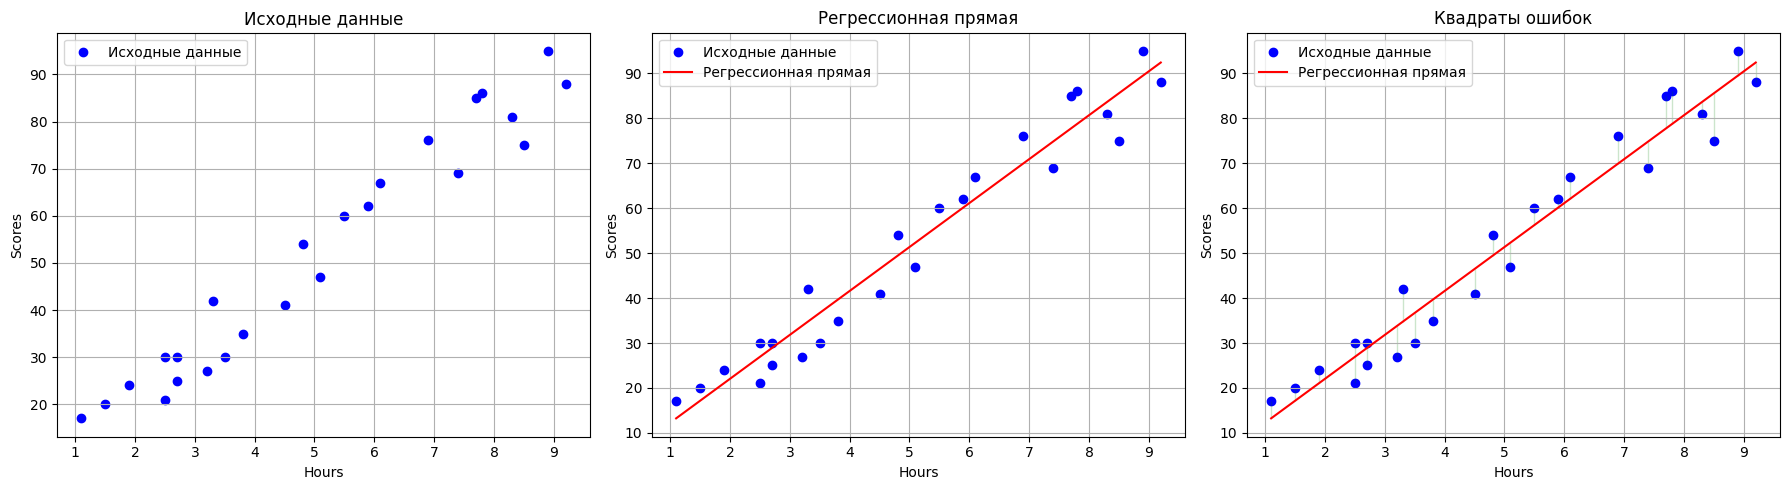

In [160]:
def run_analysis(filename="/Users/poyma/Downloads/ML1/student_scores.csv"):
    """Функция для запуска анализа с автоматическим выбором первых двух столбцов"""
    try:
        # Загрузка данных
        data = pd.read_csv(filename)
        
        x_col = data.columns[0]
        y_col = data.columns[1]
        
        print(f"Автоматически выбраны столбцы: X = '{x_col}', Y = '{y_col}'")
        
        # Запуск основного анализа
        main(filename, x_col, y_col)
            
    except FileNotFoundError:
        print(f"Ошибка: файл {filename} не найден")
    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")

# Запуск анализа
data_file = '/Users/poyma/Downloads/ML1/student_scores.csv'
run_analysis(data_file)

По умолчанию мы используем здесь файл student_scores.csv